In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
imdb = pd.read_csv("imdb.csv")

In [3]:
netflix = pd.read_csv("netflix.csv", index_col=0)

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [5]:
imdb.info()
imdb.startYear.value_counts().sort_index()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159178 entries, 0 to 159177
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     159178 non-null  int64  
 1   averageRating  159178 non-null  float64
 2   numVotes       159178 non-null  int64  
 3   primaryTitle   159178 non-null  object 
 4   originalTitle  159177 non-null  object 
 5   startYear      159177 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.3+ MB


1891.0     7
1892.0     9
1893.0     2
1894.0    49
1895.0    44
          ..
2017.0     6
2018.0     4
2019.0     9
2020.0     4
2021.0     5
Name: startYear, Length: 131, dtype: int64

In [6]:
df = netflix.merge(imdb, left_on=['title', 'release_year'], right_on=(['primaryTitle', 'startYear']))
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 0,averageRating,numVotes,primaryTitle,originalTitle,startYear
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",79497,6.9,539,Sankofa,Sankofa,1993.0
1,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,105298,6.5,3350,Jeans,Jeans,1998.0
2,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,49830,8.0,554826,Jaws,Jaws,1975.0
3,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...,53719,5.8,72057,Jaws 2,Jaws 2,1978.0
4,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,"September 16, 2021",2001,R,122 min,"Dramas, Thrillers",A rookie cop with one day to prove himself to ...,99540,7.7,403001,Training Day,Training Day,2001.0


In [7]:
df['is_drama'] = [True if 'Dramas' in x else False for x in df['listed_in']]
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 0,averageRating,numVotes,primaryTitle,originalTitle,startYear,is_drama
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",79497,6.9,539,Sankofa,Sankofa,1993.0,True
1,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,105298,6.5,3350,Jeans,Jeans,1998.0,False
2,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,49830,8.0,554826,Jaws,Jaws,1975.0,True
3,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...,53719,5.8,72057,Jaws 2,Jaws 2,1978.0,True
4,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,"September 16, 2021",2001,R,122 min,"Dramas, Thrillers",A rookie cop with one day to prove himself to ...,99540,7.7,403001,Training Day,Training Day,2001.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch...",89978,4.9,154854,Wild Wild West,Wild Wild West,1999.0,False
433,Movie,Willy Wonka & the Chocolate Factory,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany","January 1, 2020",1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...,45292,7.8,183613,Willy Wonka & the Chocolate Factory,Willy Wonka & the Chocolate Factory,1971.0,False
434,Movie,Winter of Our Dreams,John Duigan,"Judy Davis, Bryan Brown, Cathy Downes, Baz Luh...",Australia,"November 1, 2016",1981,NR,86 min,"Classic Movies, Dramas","After the death of a long-ago lover, married p...",58514,6.2,292,Winter of Our Dreams,Winter of Our Dreams,1981.0,True
435,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,82537,6.7,46790,Wyatt Earp,Wyatt Earp,1994.0,False


In [8]:

movies = df[df['type'] == 'Movie']
movies['duration_int'] = movies['duration'].apply(lambda x: x[:-4]).astype("int")
movies

C:\Users\P\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 0,averageRating,numVotes,primaryTitle,originalTitle,startYear,is_drama,duration_int
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",79497,6.9,539,Sankofa,Sankofa,1993.0,True,125
1,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,105298,6.5,3350,Jeans,Jeans,1998.0,False,166
2,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,49830,8.0,554826,Jaws,Jaws,1975.0,True,124
3,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...,53719,5.8,72057,Jaws 2,Jaws 2,1978.0,True,116
4,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,"September 16, 2021",2001,R,122 min,"Dramas, Thrillers",A rookie cop with one day to prove himself to ...,99540,7.7,403001,Training Day,Training Day,2001.0,True,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch...",89978,4.9,154854,Wild Wild West,Wild Wild West,1999.0,False,106
433,Movie,Willy Wonka & the Chocolate Factory,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany","January 1, 2020",1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...,45292,7.8,183613,Willy Wonka & the Chocolate Factory,Willy Wonka & the Chocolate Factory,1971.0,False,100
434,Movie,Winter of Our Dreams,John Duigan,"Judy Davis, Bryan Brown, Cathy Downes, Baz Luh...",Australia,"November 1, 2016",1981,NR,86 min,"Classic Movies, Dramas","After the death of a long-ago lover, married p...",58514,6.2,292,Winter of Our Dreams,Winter of Our Dreams,1981.0,True,86
435,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,82537,6.7,46790,Wyatt Earp,Wyatt Earp,1994.0,False,191


Youssef Chahine     10
John G. Avildsen     5
Steven Spielberg     5
Johnnie To           4
Martin Scorsese      4
                    ..
Robert Altman        1
Raj Khosla           1
Shekhar Kapur        1
Charlotte Zwerin     1
Peter Spirer         1
Length: 336, dtype: int64

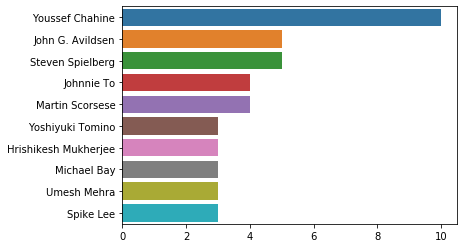

In [9]:
directors = df.director.str.split(',', expand=True).stack().reset_index(drop=True)

top10 = directors.value_counts().head(10)
top10.values, top10.index
sns.barplot(top10.values, top10.index)
directors.value_counts()

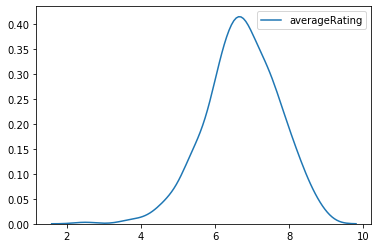

In [11]:

sns.kdeplot(df['averageRating'])